In [334]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [335]:
df = pd.read_csv('DatasetFallosMaquinas.csv', sep=';')
df

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure
0,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No
1,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No
2,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No
3,63,80,Operator1,550,1,1,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93,No
4,65,81,Operator1,1928,1,2,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,66,79,Operator8,937,0,2,1875,1719,219,748,1901,819,546,901,1512,1477,537,410,7,No
8780,60,77,Operator8,379,3,0,814,1990,1606,1346,962,875,1067,608,251,1476,522,943,8,No
8781,61,77,Operator8,595,3,1,1659,1134,1314,907,1119,1623,272,1149,1951,1835,1554,200,9,No
8782,72,81,Operator8,1038,3,2,254,1400,564,216,1011,1909,502,470,1331,1696,229,1192,10,No


In [336]:
df.describe()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,64.026412,83.337090,1090.900387,1.489868,0.999203,1071.629895,1075.822860,1076.023793,1086.897086,1077.277209,1082.014572,1082.403005,1088.719148,1088.329349,1076.755806,1088.307377,1082.392304,217.341872
std,2.868833,4.836256,537.097769,1.115605,0.816473,536.518466,533.158826,534.004966,538.195156,537.187671,532.983115,537.582829,534.995992,533.299486,535.111353,537.264847,537.527604,151.751750
min,5.000000,65.000000,155.000000,0.000000,0.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,1.000000
25%,62.000000,80.000000,629.000000,0.000000,0.000000,608.750000,606.000000,623.000000,621.000000,612.000000,631.000000,619.000000,627.000000,627.000000,609.000000,617.000000,614.000000,90.000000
50%,64.000000,83.000000,1096.000000,1.000000,1.000000,1058.000000,1077.000000,1072.000000,1089.000000,1074.000000,1078.000000,1080.000000,1093.000000,1082.000000,1067.000000,1088.500000,1076.000000,195.000000
75%,66.000000,87.000000,1555.000000,2.000000,2.000000,1533.000000,1541.000000,1537.000000,1558.000000,1541.000000,1532.000000,1547.000000,1550.000000,1552.000000,1539.000000,1560.000000,1550.000000,324.000000
max,78.000000,122.000000,2011.000000,3.000000,2.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,666.000000


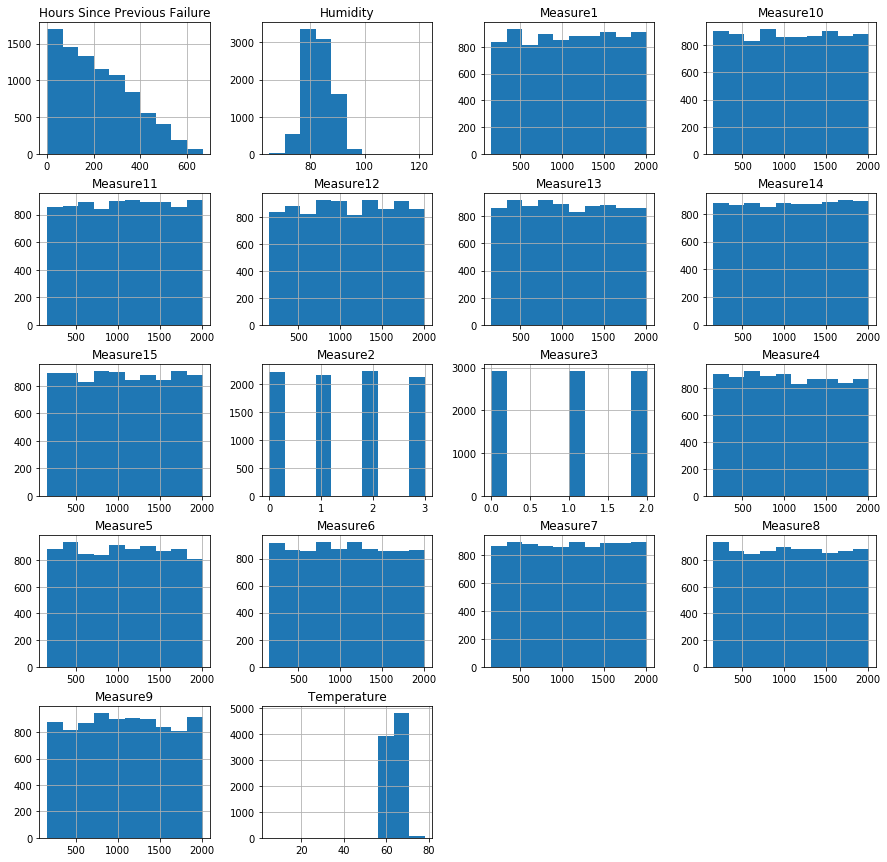

In [337]:
df.hist(figsize=(15,15));

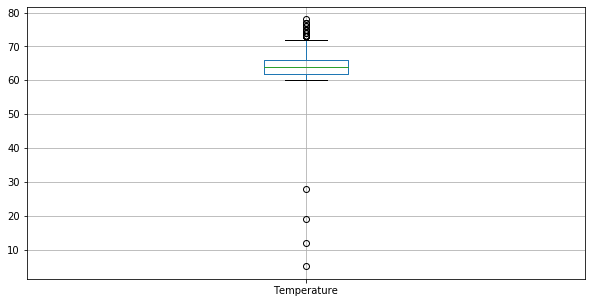

In [338]:
df.boxplot(column='Temperature', figsize=(10,5))
plt.show()

In [339]:
df = df[df['Temperature'] > 50]

In [340]:
cat_columns=['Operator','Measure2','Measure3','Failure']
df_cat = df[cat_columns].astype('category').copy()
df_num = df.drop(columns=cat_columns).copy()

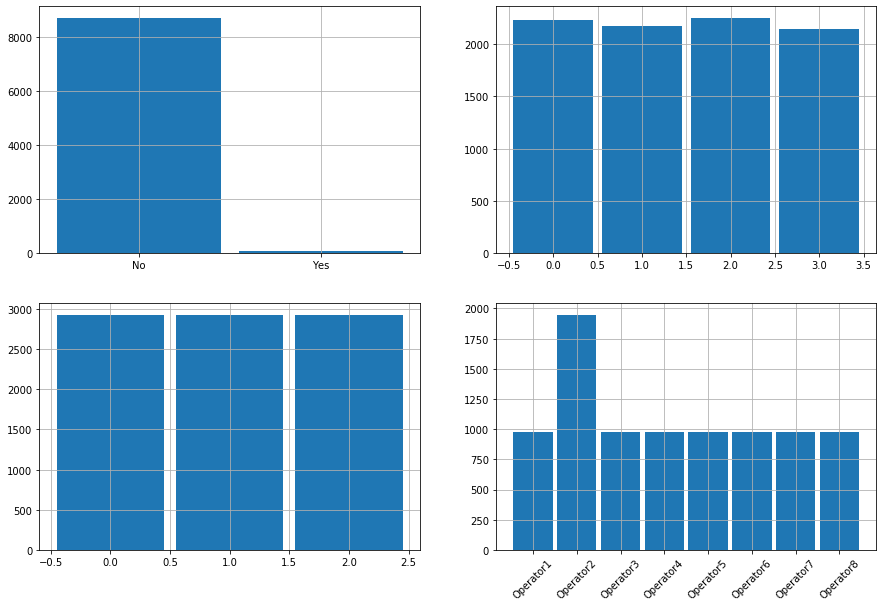

In [341]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
df_cat['Measure2'].sort_values().hist(ax=axes[0,1], align='left', bins=np.arange(5), rwidth=0.9)
df_cat['Measure3'].sort_values().hist(ax=axes[1,0], align='left', bins=np.arange(4), rwidth=0.9)
df_cat['Operator'].sort_values().hist(ax=axes[1,1], align='left', xrot=45, bins=np.arange(9), rwidth=0.9)
df_cat['Failure'].sort_values().hist(ax=axes[0,0], align='left', bins=np.arange(3), rwidth=0.9)
plt.show()

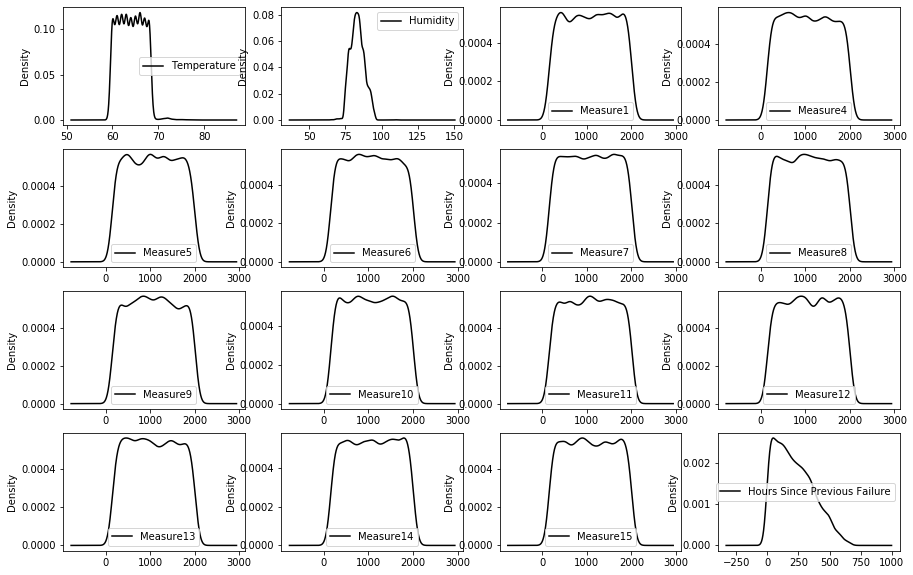

In [342]:
df_num.plot.kde(subplots=True, style='k', sharex=False, sharey=False, layout=(4,4), figsize=(15,10));

In [343]:
df_num.corr()

,Temperature,Humidity,Measure1,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure
Temperature,1.000000,-0.048705,0.003617,-0.015358,0.010737,-0.010390,-0.008864,-0.004124,-0.017440,-0.012188,0.010450,-0.001850,-0.008440,-0.009538,-0.009658,-0.012854
Humidity,-0.048705,1.000000,-0.000265,0.004491,-0.029085,-0.009035,-0.020657,0.012996,-0.003701,0.000048,0.030812,-0.015351,-0.017443,-0.001409,-0.015982,-0.001923
Measure1,0.003617,-0.000265,1.000000,0.002899,0.013076,0.011021,0.002256,0.000144,-0.013906,0.008129,0.002400,-0.014814,-0.014113,0.003385,-0.010065,-0.004256
Measure4,-0.015358,0.004491,0.002899,1.000000,-0.000607,0.016657,-0.006790,0.005622,0.007307,-0.004110,0.005138,0.021123,-0.019898,-0.005020,-0.001264,-0.016741
Measure5,0.010737,-0.029085,0.013076,-0.000607,1.000000,0.001521,-0.002917,-0.009089,0.001966,-0.010084,0.008469,0.007977,0.007540,0.018386,0.000609,0.001291
Measure6,-0.010390,-0.009035,0.011021,0.016657,0.001521,1.000000,0.004554,0.004760,0.007504,0.007793,-0.001606,0.021860,-0.013475,-0.006949,-0.006676,-0.013903
Measure7,-0.008864,-0.020657,0.002256,-0.006790,-0.002917,0.004554,1.000000,0.002703,0.000329,-0.014236,0.005715,-0.003984,-0.002024,0.012776,-0.006406,0.004019
Measure8,-0.004124,0.012996,0.000144,0.005622,-0.009089,0.004760,0.002703,1.000000,0.012132,-0.016733,-0.016721,-0.002495,-0.001352,-0.020920,0.007547,0.005407
Measure9,-0.017440,-0.003701,-0.013906,0.007307,0.001966,0.007504,0.000329,0.012132,1.000000,-0.001194,0.005077,0.017799,-0.008106,-0.002093,0.018707,-0.004074
Measure10,-0.012188,0.000048,0.008129,-0.004110,-0.010084,0.007793,-0.014236,-0.016733,-0.001194,1.000000,0.008492,0.012056,0.012210,-0.003739,-0.017197,-0.010185


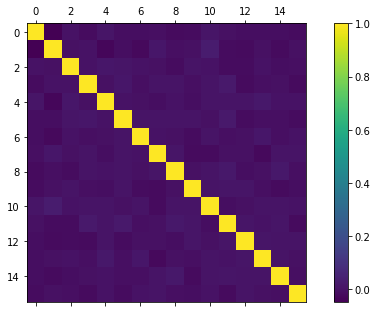

In [344]:
plt.figure(figsize=(10,5))
plt.matshow(df_num.corr(), fignum=1)
plt.colorbar()
plt.show()

In [345]:
df_cat['Failure'].value_counts()

No     8699
Yes      81
Name: Failure, dtype: int64

In [346]:
81./len(df_num)*100

0.9225512528473805

In [347]:
df_noes = df[df['Failure'] == 'No'].sample(frac=0.08, random_state=1234).copy()
df_sies = df[df['Failure'] == 'Yes'].copy()

In [348]:
df_red = df_sies.merge(df_noes, how='outer')

In [349]:
df_red['Failure'].value_counts()

No     696
Yes     81
Name: Failure, dtype: int64

In [350]:
81./len(df_red)*100

10.424710424710424

In [351]:
df_labels = pd.get_dummies(df_red[cat_columns], columns=cat_columns)
df_labels.shape

(777, 17)

In [352]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
df_red_encoded = one_hot_encoder.fit_transform(df_red[cat_columns])

df_red_encoded

<777x17 sparse matrix of type '<class 'numpy.float64'>'
	with 3108 stored elements in Compressed Sparse Row format>

In [353]:
df_red = df_red.join(df_labels)
df_red = df_red.drop(cat_columns, axis=1)
df_red = df_red.drop('Failure_Yes', axis=1)
df_red.rename(columns={'Failure_No':'Failure'}, inplace=True)

df_red

,Temperature,Humidity,Measure1,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,...,Operator_Operator7,Operator_Operator8,Measure2_0,Measure2_1,Measure2_2,Measure2_3,Measure3_0,Measure3_1,Measure3_2,Failure
0,63,85,1774,1058,614,1448,985,1487,349,1342,...,0,0,1,0,0,0,0,1,0,0
1,71,65,576,1074,1568,483,860,1430,782,1575,...,0,0,1,0,0,0,1,0,0,0
2,72,67,935,1228,1226,1883,831,853,417,1189,...,0,0,0,0,0,1,1,0,0,0
3,70,68,1479,738,1686,447,1446,1053,1977,1985,...,0,0,1,0,0,0,0,1,0,0
4,66,81,1484,1174,1362,790,718,1987,584,1890,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,66,84,1418,176,1495,1177,1110,356,1524,1855,...,0,0,0,0,1,0,1,0,0,1
773,64,75,1174,1733,1063,556,1914,1964,1200,1971,...,0,0,0,0,1,0,0,1,0,1
774,67,85,821,407,181,1887,901,1349,262,1475,...,0,0,0,1,0,0,0,0,1,1
775,66,85,1519,487,1548,340,937,1384,1673,1059,...,0,0,0,0,0,1,0,0,1,1


In [354]:
from sklearn.model_selection import train_test_split

X = df_red.drop('Failure', axis=1).copy()
y = df_red['Failure'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, 
                                                    random_state=1234)

In [355]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
k = log_reg.fit(X, y)

In [356]:
import scipy.stats as stat

def calculate_pValues(X):   
    denom = (2.0*(1.0 + np.cosh(k.decision_function(X))))
    denom = np.tile(denom, (X.shape[1], 1)).T
    F_ij = np.dot((X/denom).T, X) ## Fisher Information Matrix
    Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
    sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))

    z_scores = k.coef_[0]/sigma_estimates
    p_values = np.array([stat.norm.sf(abs(x))*2 for x in z_scores])
    
    return np.array(p_values)

In [357]:
import statsmodels.api as sm

model = sm.Logit(y, X)
model_fit = model.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


/home/leibniz/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/leibniz/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [358]:
pLim = 0.1
p_values = model_fit.pvalues[model_fit.pvalues < 0.15]
p_values.index

Index(['Temperature', 'Humidity', 'Measure9', 'Measure10',
       'Hours Since Previous Failure'],
      dtype='object')

In [359]:
X[p_values.index]

,Temperature,Humidity,Measure9,Measure10,Hours Since Previous Failure
0,63,85,349,1342,238
1,71,65,782,1575,367
2,72,67,417,1189,1
3,70,68,1977,1985,1
4,66,81,584,1890,150
...,...,...,...,...,...
772,66,84,1524,1855,149
773,64,75,1200,1971,222
774,67,85,262,1475,141
775,66,85,1673,1059,194


In [360]:
X = df_red[p_values.index].copy()
y = df_red['Failure'].copy()

In [361]:
k = log_reg.fit(X, y)

In [362]:
X.shape

(777, 5)

In [368]:
y_scoring = k.predict_proba(np.array(X))
y_scoring[0:5,1]

array([0.99385851, 0.01650488, 0.00724647, 0.02974836, 0.89665043])

In [367]:
df_red['Failure'][y_scoring[:,1] > 0.8]

0      0
4      0
5      0
8      0
22     0
      ..
772    1
773    1
774    1
775    1
776    1
Name: Failure, Length: 687, dtype: uint8